In [2]:
import os
import csv
import cv2
import matplotlib.pyplot as plt
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
# Path to the folder containing images
folder_path = "C:/Users/spark/PycharmProjects/image_matching/train/class1"

def rename_images(folder_path):
    if not os.path.exists(folder_path):
        print("Папка не существует")
        return

    # Get the list of files in the folder
    files = os.listdir(folder_path)

    # Filter only images (additional logic might be needed for filtering)
    image_files = [file for file in files if file.endswith(('jpg', 'jpeg', 'png', 'gif'))]

    # Rename images
    for i, filename in enumerate(image_files):
        extension = os.path.splitext(filename)[1]
        new_filename = f"image_{i + 1}{extension}"
        os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, new_filename))
        print(f"Переименовано изображение: {filename} -> {new_filename}")

# Specify the path to the folder containing images
folder_path = "C:/Users/spark/PycharmProjects/image_matching/train/class1"
rename_images(folder_path)

Переименовано изображение: image_1.jpg -> image_1.jpg
Переименовано изображение: image_2.jpg -> image_2.jpg
Переименовано изображение: image_3.jpg -> image_3.jpg
Переименовано изображение: image_4.jpg -> image_4.jpg
Переименовано изображение: image_5.jpg -> image_5.jpg
Переименовано изображение: image_6.jpg -> image_6.jpg
Переименовано изображение: image_7.jpeg -> image_7.jpeg
Переименовано изображение: image_8.jpeg -> image_8.jpeg


In [3]:
output_csv = 'one.csv'

# Get the list of files in the class1 folder
files = os.listdir(folder_path)

# Filter only images (other extensions can be added)
image_files = [file for file in files if file.lower().endswith(('jpg', 'jpeg', 'png', 'gif'))]

# Generate pairs of file names for creating a CSV
pairs = [(image_files[i], image_files[i + 1], 1) for i in range(0, len(image_files) - 1, 2)]

# Write pairs of file names to a CSV
with open(output_csv, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['image1', 'image2', 'accuracy'])  # Заголовок
    for pair in pairs:
        writer.writerow(pair)

print(f"Данные успешно записаны в файл '{output_csv}'.")

Данные успешно записаны в файл 'one.csv'.


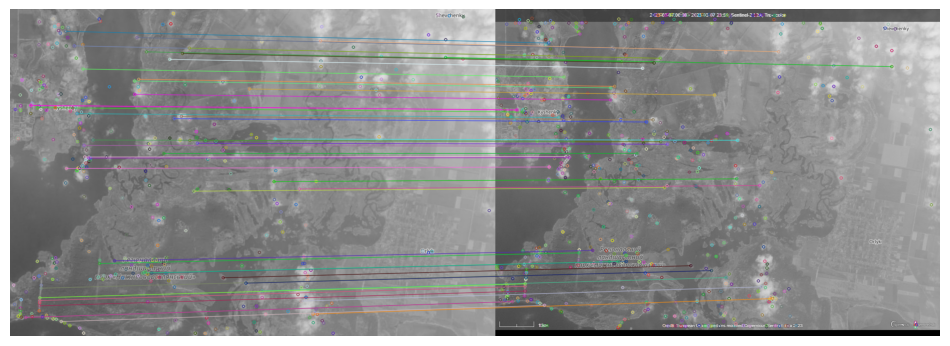

My Accuracy: 43.315 %
[0.4331476323119777]


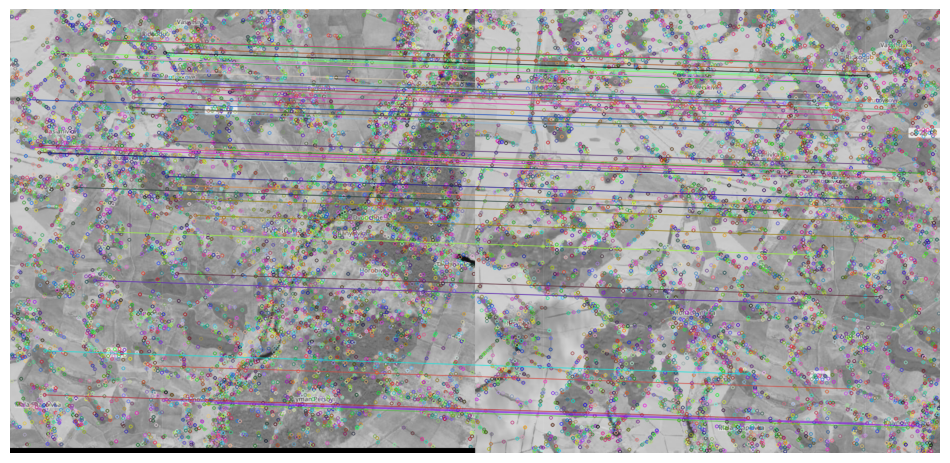

My Accuracy: 41.929 %
[0.4331476323119777, 0.41929041353383456]


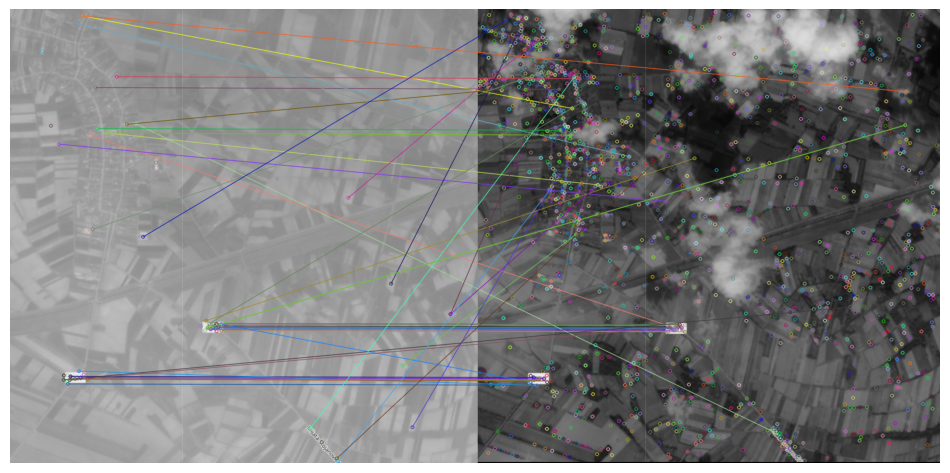

My Accuracy: 2.928 %
[0.4331476323119777, 0.41929041353383456, 0.02927927927927928]


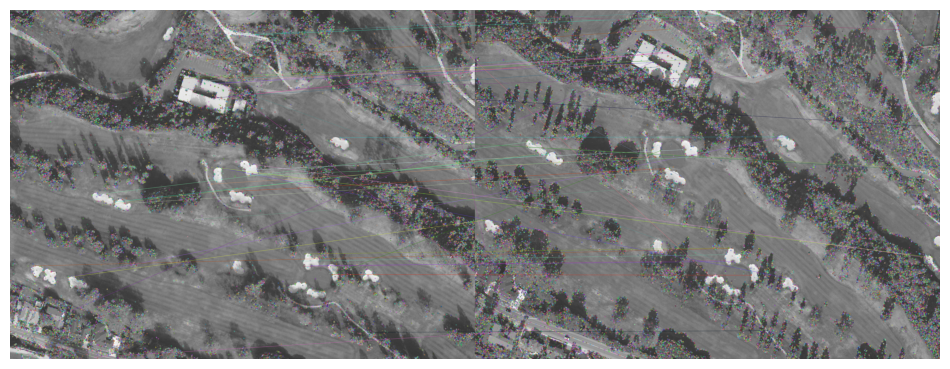

My Accuracy: 19.421 %
[0.4331476323119777, 0.41929041353383456, 0.02927927927927928, 0.194209640513606]


In [4]:
# CSV file name with image pairs
csv_file = 'one.csv'

# Reading file names from the CSV file
image_pairs = []
with open(csv_file, 'r') as file:
    csv_reader = csv.reader(file)
    headers = next(csv_reader)
    for row in csv_reader:
        image_pairs.append((row[0], row[1]))

accuracy = []
# Loading images and performing operations for each pair
for pair in image_pairs:
    # Construct paths to the images using the specified folder path and the pair of filenames
    img1_path = os.path.join(folder_path, pair[0])
    img2_path = os.path.join(folder_path, pair[1])

    # Read images using OpenCV
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)

    # # Img Rotation
    # height, width = img2.shape[:2]
    # rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 360, 2)
    # img2 = cv2.warpAffine(img2, rotation_matrix, (width, height))

    # Convert images to grayscale for feature detection and matching
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # SIFT feature detection and descriptor extraction
    sift = cv2.SIFT_create()
    keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

    # Feature matching using a brute force matcher
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

    # Visualize matches between the keypoints in the images
    matches = bf.match(descriptors_1,descriptors_2)
    matches = sorted(matches, key = lambda x:x.distance)

    # img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], None)

    # Display the visualization
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Calculate accuracy by comparing the number of matches with the maximum number of key points in the images
    accuracy2 = len(matches) / max(len(keypoints_1), len(keypoints_2))
    print(f"My Accuracy: {accuracy2 * 100:.3f} %")
    accuracy.append(accuracy2)
    print(accuracy)

In [5]:
# Writing pairs of file names and their corresponding accuracy values to a CSV file
# Opening the CSV file in write mode, ensuring it starts with an empty line
with open(output_csv, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Writing the header row with column names
    writer.writerow(['image1', 'image2', 'accuracy'])
    # Iterating through pairs of file names and accuracy values
    for pair, acc in zip(pairs, accuracy):
        # Writing a row containing the file names (pair[0] and pair[1]) and the accuracy value (acc)
        writer.writerow([pair[0], pair[1], acc])